This notebook was completed for personal enjoyment and learning reasons. I wanted to familiarize myself with data visualization and manipulation as well as practicing good coding habits. The analysis in this notebook is rather shallow and was not mean to produce any grand insights.

In this notebook I work with csv files from [this github repo](https://github.com/bendominguez0111/fantasy-csv-data), which holds statistics of every NFL player on offense, and fantasy football projections from [FantasyPros](https://www.fantasypros.com/). I briefly explore the evaluation of young Quarterbacks in the fantasy "average draft position" (ADP) system and try to adequately visualize these phenomenons.  




Here are the libraries used in this notebook.

In [105]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Firstly I wanted to create a function that creates a dataframe with all of the QB's stats from a specific year.

In [106]:
def seasonDF(year):
  """
  A function that takes a year(int) as an input and returns a dataframe with stats from that season for every QB
  """

  # The data at hand is limited so anything outside of 2012-2019 will not work
  if year > 2019 or year < 2012:
    print("Choose a year between 2012 and 2019 please.")
    return


  # Opens data from the specified year, selects only QB's, and deletes recieving stats
  df = pd.read_csv(f"https://raw.githubusercontent.com/bendominguez0111/fantasy-csv-data/master/yearly/{year}.csv")
  df = df[df["Pos"] == "QB"]
  df = df.drop(["Tgt", "Rec","ReceivingYds","ReceivingTD"], axis = 1)


  # I also want to work with projections and ADP
  projections = pd.read_csv(f"https://raw.githubusercontent.com/Feugon/FantasyFootballPractice/main/Data/FantasyPros_{year}_QB_ADP_Rankings.csv")
  projections = projections[["Player","QB","Overall"]]
  projections = projections.rename(columns = {"QB" : "PositionADP", "Overall" : "OverallADP"})



  """Some players have suffixes in their names for the projections data, which ruins the merge on name
  so to combat that we will delete anything after the second space """


  # Converts the player column to strings, then creates a np array which will be filled with first and last names
  projections["Player"] = projections["Player"].astype("str")
  names = np.array([])


  # Removes anything after a second space and then adds it to the np.array
  for name in projections["Player"]:
    names = np.append(names, ' '.join(name.split(' ')[0:2]))


  # Inserts the shortened names to our df
  projections["Player"] = names


  # Now we merge projections onto the orginal dataFrame based on player name and drop a useless column
  df = pd.merge(df, projections, on ="Player")
  df = df.drop("Unnamed: 0", axis = 1)

    # Sort Values based on fantasy points
  df = df.sort_values(by="FantasyPoints", ascending=False)


  # Create a sorted numpy array that represents positional rank for every QB and add it to the df
  rankings = np.arange(1, df.shape[0] + 1)
  df["PositionRank"] = rankings

  return df


data = seasonDF(2018)
data


,Player,Tm,Pos,Age,G,GS,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,FantasyPoints,Int,Fumbles,FumblesLost,PositionADP,OverallADP,PositionRank
0,Patrick Mahomes,KAN,QB,23.0,16.0,16.0,5097.0,50.0,580.0,272.0,2.0,60.0,415.08,12.0,9.0,2.0,16.0,110.0,1
1,Matt Ryan,ATL,QB,33.0,16.0,16.0,4924.0,35.0,608.0,125.0,3.0,33.0,350.96,7.0,10.0,5.0,13.0,100.0,2
2,Ben Roethlisberger,PIT,QB,36.0,16.0,16.0,5129.0,34.0,675.0,98.0,3.0,31.0,333.86,16.0,7.0,2.0,11.0,93.0,3
3,Deshaun Watson,HOU,QB,23.0,16.0,16.0,4165.0,26.0,505.0,551.0,5.0,99.0,331.70,9.0,9.0,3.0,2.0,36.0,4
4,Andrew Luck,IND,QB,29.0,16.0,16.0,4593.0,39.0,639.0,148.0,0.0,46.0,323.92,15.0,6.0,1.0,9.0,83.0,5
5,Aaron Rodgers,GNB,QB,35.0,16.0,16.0,4442.0,25.0,597.0,269.0,2.0,43.0,306.58,2.0,6.0,3.0,1.0,24.0,6
6,Jared Goff,LAR,QB,24.0,16.0,16.0,4688.0,32.0,561.0,108.0,2.0,43.0,304.32,12.0,12.0,5.0,15.0,107.0,7
7,Drew Brees,NOR,QB,39.0,15.0,15.0,3992.0,32.0,489.0,22.0,4.0,31.0,302.98,5.0,5.0,1.0,6.0,60.0,8
8,Russell Wilson,SEA,QB,30.0,16.0,16.0,3448.0,35.0,427.0,376.0,0.0,67.0,297.42,7.0,10.0,2.0,4.0,48.0,9
9,Dak Prescott,DAL,QB,25.0,16.0,16.0,3885.0,22.0,526.0,305.0,6.0,75.0,281.90,8.0,12.0,6.0,17.0,136.0,10


Now I want to create a function that creates a dataframe of a specified players season stats over the years 2012-2019, (empty columns if the qb didn't play that year).

In [107]:
def get_playerStats(playerName):
  """
  Takes in a player's name as a string and returns a DF with their stats from 2012-2019
  If they didn't play any of those seasons then there is no row for that year
  """

  # Our output dataFrame
  df = pd.DataFrame()
  index = 0


  # For every year in 2012-2019 adds the row corresponding to players names for that year
  for year in range(2012,2020):
    yearDF = seasonDF(year)
    yearDF = yearDF[yearDF["Player"] == playerName]

    # If the yearly data frame isn't empty then add that row to the output df, additionaly create a year column
    if not yearDF.empty:
      df = pd.concat([df,yearDF])

      # This makes sure that the indices are unique
      df.index += index / 1000

      df.loc[df.index[index], "Year"] = year
      index += 1


  # Column for how many years a player was in a league
  df["SeasonInNFL"] = np.arange(1, 1 + index)
  df.index = np.round(df.index)
  return df



get_playerStats("Patrick Mahomes")

,Player,Tm,Pos,Age,G,GS,PassingYds,PassingTD,PassingAtt,RushingYds,...,RushingAtt,FantasyPoints,Int,Fumbles,FumblesLost,PositionADP,OverallADP,PositionRank,Year,SeasonInNFL
37.0,Patrick Mahomes,KAN,QB,22.0,1.0,1.0,284.0,0.0,35.0,10.0,...,7.0,10.36,1.0,0.0,0.0,34.0,305.0,38,2017.0,1
0.0,Patrick Mahomes,KAN,QB,23.0,16.0,16.0,5097.0,50.0,580.0,272.0,...,60.0,415.08,12.0,9.0,2.0,16.0,110.0,1,2018.0,2
6.0,Patrick Mahomes,KAN,QB,24.0,14.0,14.0,4031.0,26.0,484.0,218.0,...,43.0,285.04,5.0,3.0,2.0,1.0,12.0,6,2019.0,3


Now the analysis begins! First I want to visualize the positional rank of quarterbacks vs. the ADP they were given for every year in 2012-2019 range. Most fantasy football leagues have one quarterback as a starter and one backup so I chose to plot only the top 24 QB's (assuming that the league has 12 players)

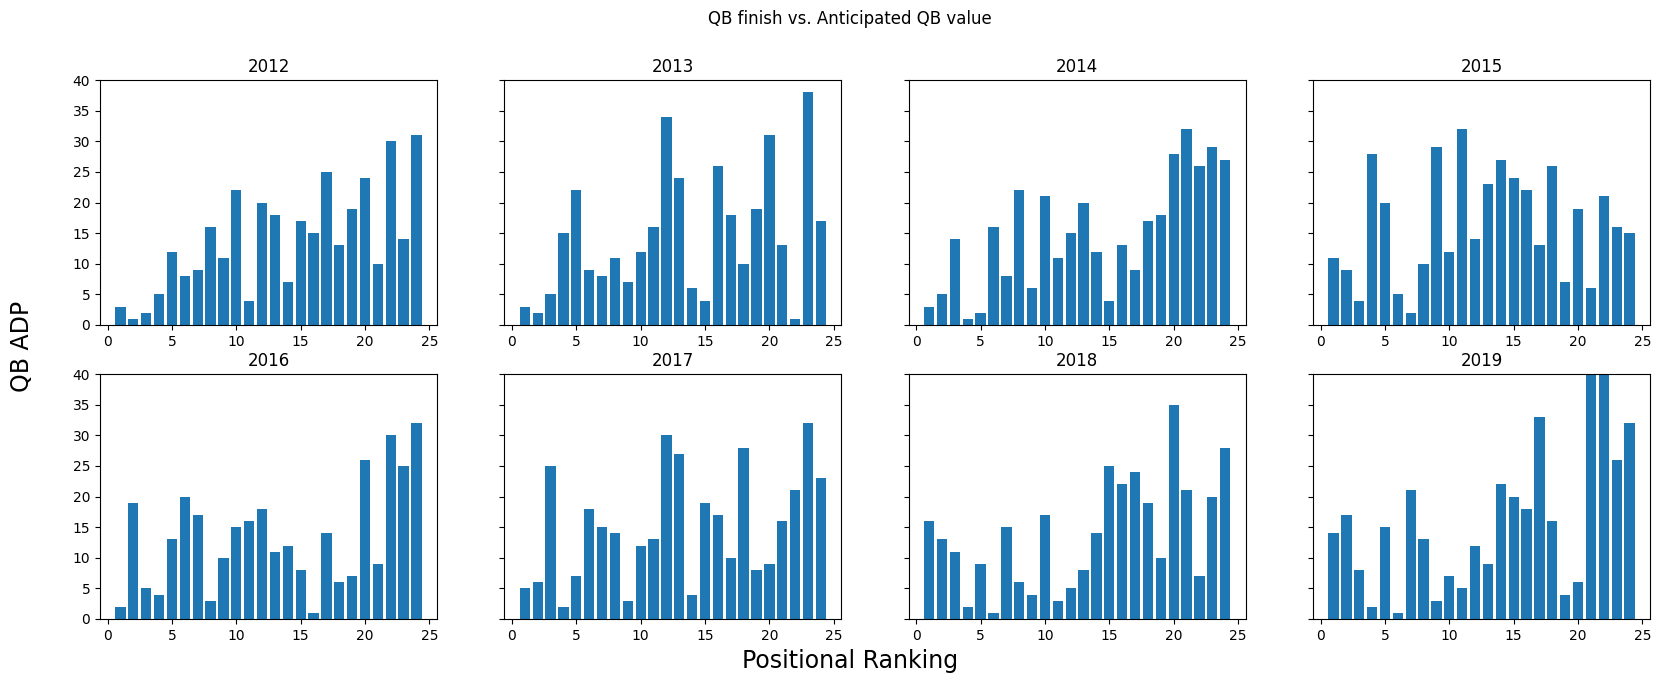

In [108]:
# Creates our figure, with y values ranging from 0,40 on every subplot
fig, ax = plt.subplots(2,4, figsize = (20,7), sharey = True)
plt.ylim([0,40])
fig.suptitle("QB finish vs. Anticipated QB value")

# Common x and y labels for stylistic reasons
fig.text(0.5, 0.04, "Positional Ranking", ha='center', fontsize = 17)
fig.text(0.08, 0.5, "QB ADP", va='center', rotation='vertical', fontsize = 17)


# Index vars for axis locations
row = 0
column = 0


# Creates a graph for every year in range
for year in range(2012,2020):


  # We only want the top 24 qb's (will explain in text)
  df = seasonDF(year)[seasonDF(year)["PositionRank"] <= 24]

  # Plots and titles the graphs
  ax[column, row].bar(df["PositionRank"], df["PositionADP"])
  ax[column, row].set(title = year)

  # Indexing code
  row += 1
  if year == 2015:
    column += 1
    row = 0


So as we can see there are some major discrepancies between experts' ADPs and the actual results of the season (otherwise we would see perfectly sorted graphs). Let's take a closer look at the 2018 year which has particularly fascinating patterns

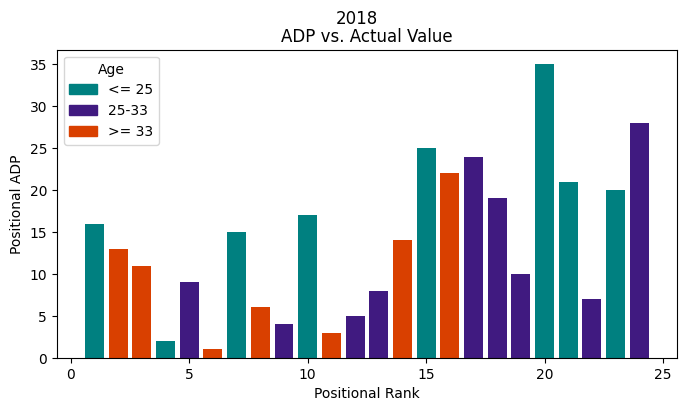

In [109]:
fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle("2018")

# Once again taking top 24 qbs from a sepcific year
df = seasonDF(2018)[seasonDF(2018)["PositionRank"] <= 24]

# Created a color map based on the age of the players
colors = {"<= 25":(0,0.5,0.5), "25-33":(0.25,0.1,0.5), ">= 33":(0.85,0.25,0)}
cmap = [colors["<= 25"] if (age <= 25) else colors[">= 33"] if (age >= 33) else colors["25-33"] for age in df["Age"] ]

# Creates a legend for the color map
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels, title = "Age")

# Creates the bar graph
ax.bar(df["PositionRank"], df["PositionADP"], color = cmap)
ax.set(title = "ADP vs. Actual Value", xlabel = "Positional Rank", ylabel = "Positional ADP")

plt.show()

As we can see by the graph above younger players are criminally undervalued by the ADP rankings. Although a statline like years in the league would be a better variable to explore I unfortunately don't have a 100% accurate way of obtaining that data within my data sets, the best I can do is see how many seasons a player played in the 2012-2019 period. Now I want to observe how this pattern holds up for every year in our data.

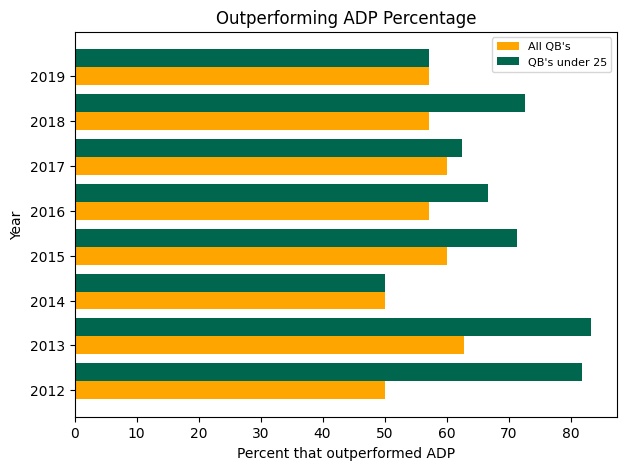

In [110]:
# Numpy arrays that will hold percentage points of qb's outperforming ADP
allQB = np.array([])
youngQB = np.array([])

for year in range(2012,2020):

  df = seasonDF(year)

  # Creates an np array with percentages of all qbs outperforming ADP
  df = df[df["PositionRank"] <= 35]
  numOfQB = df.shape[0]
  outperformingQB = df[df["PositionRank"] < df["PositionADP"]].shape[0]
  allQB = np.append(allQB, outperformingQB / numOfQB * 100)

  # Creates an np array with percentages of young qbs outperforming ADP
  df = df[df["Age"] <= 25]
  numOfQB = df.shape[0]
  outperformingQB = df[df["PositionRank"] < df["PositionADP"]].shape[0]
  youngQB = np.append(youngQB, outperformingQB / numOfQB * 100)



fig, ax = plt.subplots(figsize = (7,5) )

years = np.arange(2012,2020)
width = 0.4

# Horizontal bar plot
ax.barh(years, allQB, width, color= "orange", label="All QB's")
ax.barh(years + width, youngQB, width, color=(0,0.4,0.3), label="QB's under 25")

ax.set(title = "Outperforming ADP Percentage", ylabel = "Year", xlabel = "Percent that outperformed ADP")

ax.legend(loc="upper right", fontsize = 8)
plt.show()


For the visual above I looked at the probabilities that a QB will outperform his ADP and how that changes when we put an age restriction. I decided to look at the top 35 quarterbacks because there are 32 starters and I added a little buffer to that number. Originally I wanted to look at top 24 but those QB's who made it in probably had a good season to begin with so the numbers will be rather inflated. Overall the analysis from my data lead me to believe that there is a hint of underappreciation of younger QB's who have not proved much. This trend was very prevalent in the 2022-2023 season when QB's such as Trevor Lawrence and Justin Fields showed drastic improvements in their second season. As stated before this project is just a practicing experience for me to work with a new coding language and the level of analysis in this notebook is rather shallow.  